# WeatherPy
----

#### Note
* 'Northern Hemisphere - Max Temp vs. Latitude Linear Regressions' shows a negative correlation. As we move away from the equatore the temperature decreases.
* 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression' shows a positive correlation. As we get closer to the equator the temperature increases.
* Both, Humidity(%) and Wind Speed vs. Latitude Linear Regressions for the Northern and the Southern Hemispheres do not display much of a correlation between the data sets.

In [1]:
#!pip install citipy

In [24]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from scipy.stats import linregress
from citipy import citipy
from api_keys import weather_api_key

## Generate Cities List

In [25]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#city = "London"
# city sample test the url
#query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
#query_url

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Utilize citipy to lookup for city names with geo-coordinates
# Lists of lat_lons and cities
geocoords = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
geocoords = zip(lats, lons)

#Identify nearest city for each lat, lon coordinate
for geocoord in geocoords:
    city = citipy.nearest_city(geocoord[0], geocoord[1]).city_name
    
#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# set lists for the dataframe

city_apd = []
cloudiness = []
dates = []
humidities = []
lats = []
lons = []
max_temps = []
wind_speeds = []
countries = []

# Initialize
count = 0
set_num = 1

print("\nBeginning of Data Retrieval\n------------------------------")
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        # A set processing 49 cities

        city_apd.append(city)
 
        print(f"Processing Record {count} of Set {set_num} | {city}")
    
# Every set has 50 records, from 0 to 49             
        if count > 48:
            count = 0
            set_num +=1
        else:    
            count +=1


    except Exception:
        print("City not found. Skipping...")
    
print("------------------------------\nEnd of Data Retrieval\n------------------------------")


Beginning of Data Retrieval
------------------------------
Processing Record 0 of Set 1 | qaanaaq
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ixtapa
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | mikhaylovka
Processing Record 6 of Set 1 | srandakan
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | puerto asis
Processing Record 11 of Set 1 | esso
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | vanavara
Processing Record 17 of Set 1 | hualmay
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | moses lake
Processing Record 20 of Set 1 | arrecife
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | hermanus
Pr

Processing Record 37 of Set 4 | iqaluit
Processing Record 38 of Set 4 | port moresby
Processing Record 39 of Set 4 | chumikan
Processing Record 40 of Set 4 | yumen
Processing Record 41 of Set 4 | genhe
Processing Record 42 of Set 4 | ketchikan
Processing Record 43 of Set 4 | ufimskiy
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | yara
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | wanxian
Processing Record 0 of Set 5 | pangody
Processing Record 1 of Set 5 | vila velha
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | abu kamal
Processing Record 5 of Set 5 | ljungby
Processing Record 6 of Set 5 | soanierana ivongo
Processing Record 7 of Set 5 | bengkulu
Processing Record 8 of Set 5 | arica
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | werda
Processing Record 11 of Set 5 

Processing Record 23 of Set 8 | nova vicosa
Processing Record 24 of Set 8 | saint-augustin
Processing Record 25 of Set 8 | sumenep
City not found. Skipping...
Processing Record 26 of Set 8 | gigmoto
Processing Record 27 of Set 8 | omsukchan
Processing Record 28 of Set 8 | ewo
Processing Record 29 of Set 8 | kongsberg
Processing Record 30 of Set 8 | miri
Processing Record 31 of Set 8 | killybegs
Processing Record 32 of Set 8 | verkhnevilyuysk
Processing Record 33 of Set 8 | antalaha
Processing Record 34 of Set 8 | benguela
Processing Record 35 of Set 8 | kushmurun
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | cabedelo
Processing Record 38 of Set 8 | christchurch
Processing Record 39 of Set 8 | viedma
Processing Record 40 of Set 8 | juarez
Processing Record 41 of Set 8 | dalianwan
Processing Record 42 of Set 8 | galle
City not found. Skipping...
Processing Record 43 of Set 8 | lubu
Processing Record 44 of Set 8 | meadow lake
Processing Record 45 of Set 8 | jay

Processing Record 11 of Set 12 | savinka
Processing Record 12 of Set 12 | camana
------------------------------
End of Data Retrieval
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create dictionary for establishing dataframe
weather_dict = {
    "City":city_apd,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lons,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

#weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,86,GL,1602448313,84,77.48,-69.36,-0.29,3.57
1,rikitea,16,PF,1602448313,78,-23.12,-134.97,23.25,5.25
2,ushuaia,40,AR,1602448282,57,-54.80,-68.30,10.00,10.80
3,ixtapa,20,MX,1602448313,66,20.70,-105.20,31.00,5.10
4,castro,0,BR,1602448314,64,-24.79,-50.01,18.87,2.83


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Creat DataFrame where humidity is under 100%. In other words, remove where the humidity > 100%
weather_under100_df = weather_df[weather_df["Humidity"]<= 100]
weather_under100_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,86,GL,1602448313,84,77.48,-69.36,-0.29,3.57
1,rikitea,16,PF,1602448313,78,-23.12,-134.97,23.25,5.25
2,ushuaia,40,AR,1602448282,57,-54.80,-68.30,10.00,10.80
3,ixtapa,20,MX,1602448313,66,20.70,-105.20,31.00,5.10
4,castro,0,BR,1602448314,64,-24.79,-50.01,18.87,2.83


In [7]:
#  Get the indices of cities that have humidity over 100%.

index = weather_df[weather_df["Humidity"]> 100].index

#  Make a new DataFrame equal to the city weather data to drop all humidity outliers by index.
#  Passing "inplace=False" will make a copy of the city weather data DataFrame, which we call "clean_weather_df"

clean_weather_df = weather_df.drop(index, inplace=False)

clean_weather_df["Humidity"].describe()


count    563.000000
mean      72.577265
std       21.709805
min        1.000000
25%       62.000000
50%       79.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [8]:
# Print clean weather dataframe by humidity in descending order to make sure the humidity max is not over 100%

clean_weather_df.sort_values(by=["Humidity"], inplace=True, ascending=False)

clean_weather_df.head()
 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
357,mayo,90,US,1602448392,100,38.89,-76.51,21.00,1.87
27,benalla,75,AU,1602448318,100,-36.55,145.98,8.89,1.50
256,mar del plata,90,AR,1602448368,100,-38.00,-57.56,11.00,7.20
222,grindavik,90,IS,1602448361,100,63.84,-22.43,7.00,3.60
229,loviisa,90,FI,1602448362,100,60.46,26.23,9.00,1.00


In [10]:
# Output clean city data to a csv
clean_weather_df.to_csv('../output_data/cities_part_I.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

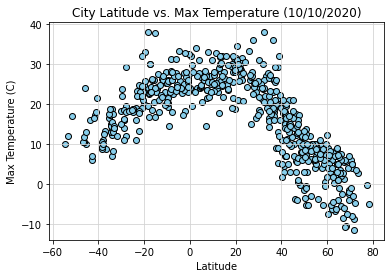

In [11]:
# create graph for latitude vs. Temperature
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

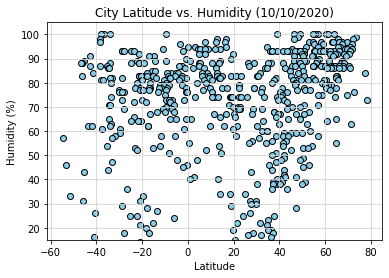

In [12]:
# create graph for latitude vs. humidity
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

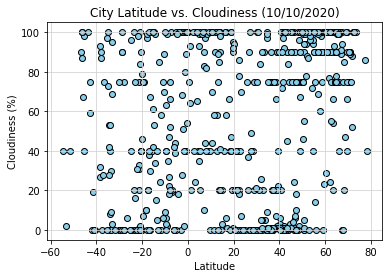

In [13]:
# create graph for latitude vs. cloudiness
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

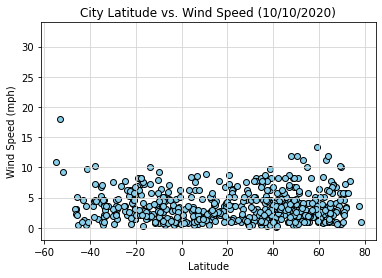

In [14]:
# Create graph for latitude vs. wind speed
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_wind.png")
plt.show()

## Linear Regression

In [15]:
# Create Northern Hemisphere DataFrame
northern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) > 0, :]
# Create Southern Hemisphere DataFrame
southern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.49x + 34.13


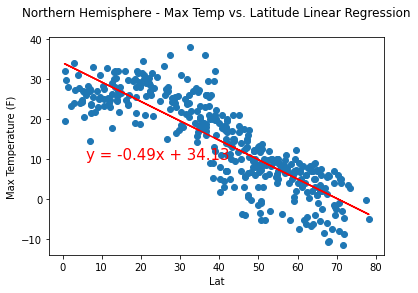

In [16]:
# # Create Northern Hemisphere DataFrame
# northern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) > 0, :]

# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression\n')

plt.savefig("fig_north_temp_lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.34x + 27.9


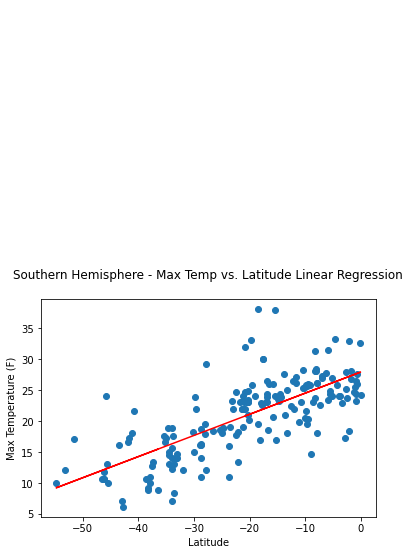

In [17]:
# # Create Southern Hemisphere DataFrame
# southern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) < 0, :]

# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression\n')
plt.savefig("fig_south_temp_lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 61.53


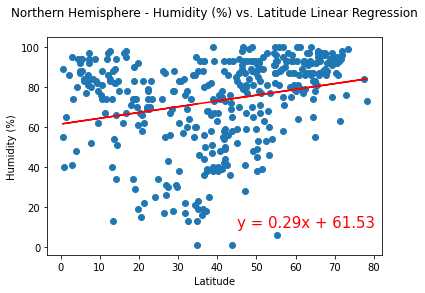

In [18]:
# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression\n')

plt.savefig("fig_north_hum_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.15x + 74.3


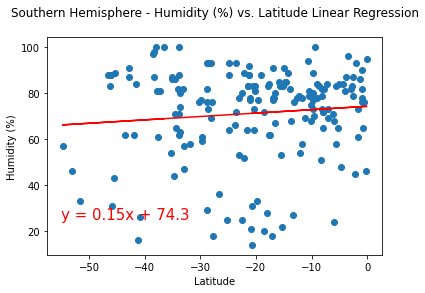

In [19]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression\n')

plt.savefig("fig_north_hum_lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.46x + 40.06


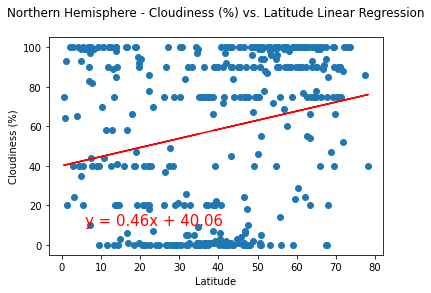

In [20]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression\n')

plt.savefig("fig_north_cloud_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.23x + 49.45


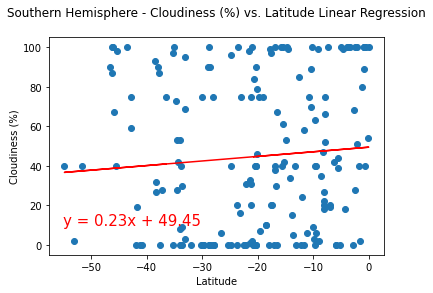

In [21]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression\n')

plt.savefig("fig_south_cloud_lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 3.0


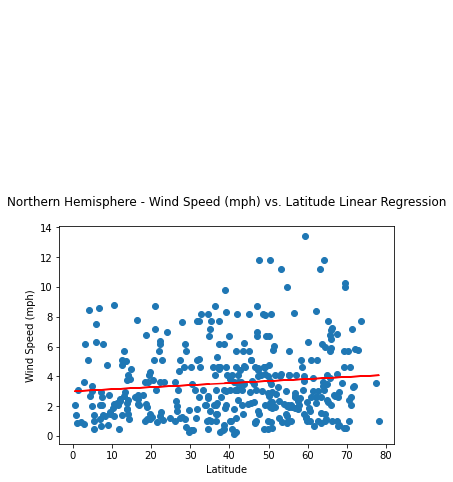

In [22]:
# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression\n')

plt.savefig("fig_north_wind_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 2.95


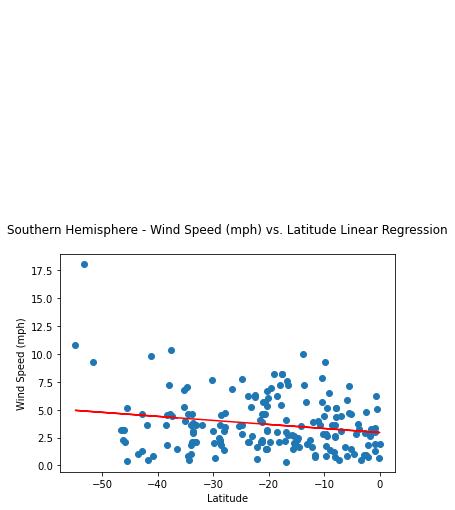

In [23]:
# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression\n')

plt.savefig("fig_sourth_wind_lat.png")
plt.show()